Data exploration with pandas and sklearn
The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [6]:
# you could start with something like this...
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas

datafile = 'data/dataset.csv'

df = pd.read_csv(datafile) # df for dataframe but you can call it whatever you like

row_count = len(df) # number of rows

shape = df.shape
print("This dataset has " + str(shape[0]) + " rows and " + str(shape[1]) + " columns") # first index is number of rows and second index is number of columns

df #return numeric features (column) for each observation (row) and dimensions of dataset

This dataset has 496 rows and 10 columns


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
0,3.371,16.877,15.345,8.080,8.510,14.404,5.904,-0.368,11.604,3.321
1,11.765,18.278,9.311,4.095,13.699,1.487,16.061,7.425,5.981,-0.338
2,3.966,2.498,9.110,12.823,-0.337,15.771,5.326,18.289,12.466,9.633
3,11.498,16.627,10.134,3.632,13.124,1.083,17.141,8.624,6.133,0.015
4,12.262,18.252,10.158,4.073,14.841,2.451,15.654,8.131,5.142,-0.079
...,...,...,...,...,...,...,...,...,...,...
491,12.001,18.166,9.695,3.458,14.827,1.261,16.496,8.015,5.047,0.119
492,12.440,17.676,9.743,3.566,14.047,1.006,16.271,7.548,5.434,0.060
493,11.954,17.943,10.675,3.549,13.317,2.244,16.153,8.085,5.463,0.408
494,12.437,18.111,10.817,4.416,14.656,2.432,15.519,7.902,6.377,1.002


Question 2 (5 points). Make a scatter plot of dim1 versus dim2, ie the first column versus the second one. How many clusters do you see in this plot?

There are 3 clusters


Index(['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10'],
      dtype='object')

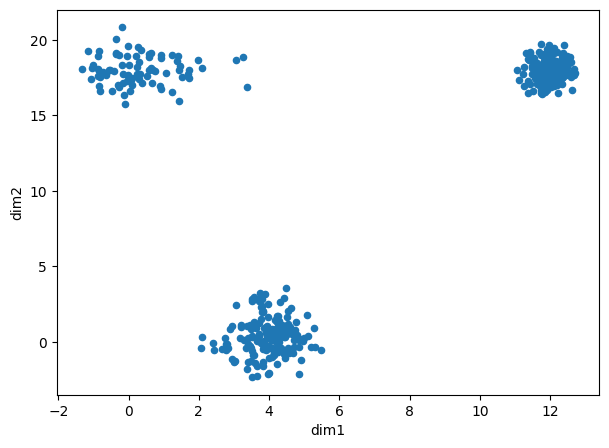

In [7]:
# You could use either 
#
#plt.scatter(xvals, yvals) #with appropriate choices for xvals and yvals (see lecture 10 for examples) 
#
# or
#
#df.plot.scatter(...) #filling in the "..."
#
# recall that df['dim1'] returns the single column of values in the 'dim1' column


df.plot.scatter(x='dim1', y='dim2', figsize=(7,5))
print("There are 3 clusters")
df.columns

# Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using sklearn.preprocessing.StandardScaler; see the lectures10and11 notebook for an example of how to do that.)

The fraction of the variation explained by the first two components: [0.7736375 0.159209 ]
Raw first two components: [[-0.27256273 -0.48641875  0.14221149  0.19842901 -0.35891658  0.44740819
  -0.33843112  0.21034076  0.08503751  0.36674616]
 [-0.34246881  0.56809052 -0.51523883 -0.08573003  0.17143203  0.25443471
  -0.38347495  0.07311793  0.05522132  0.19388902]]
There are now 5 clusters


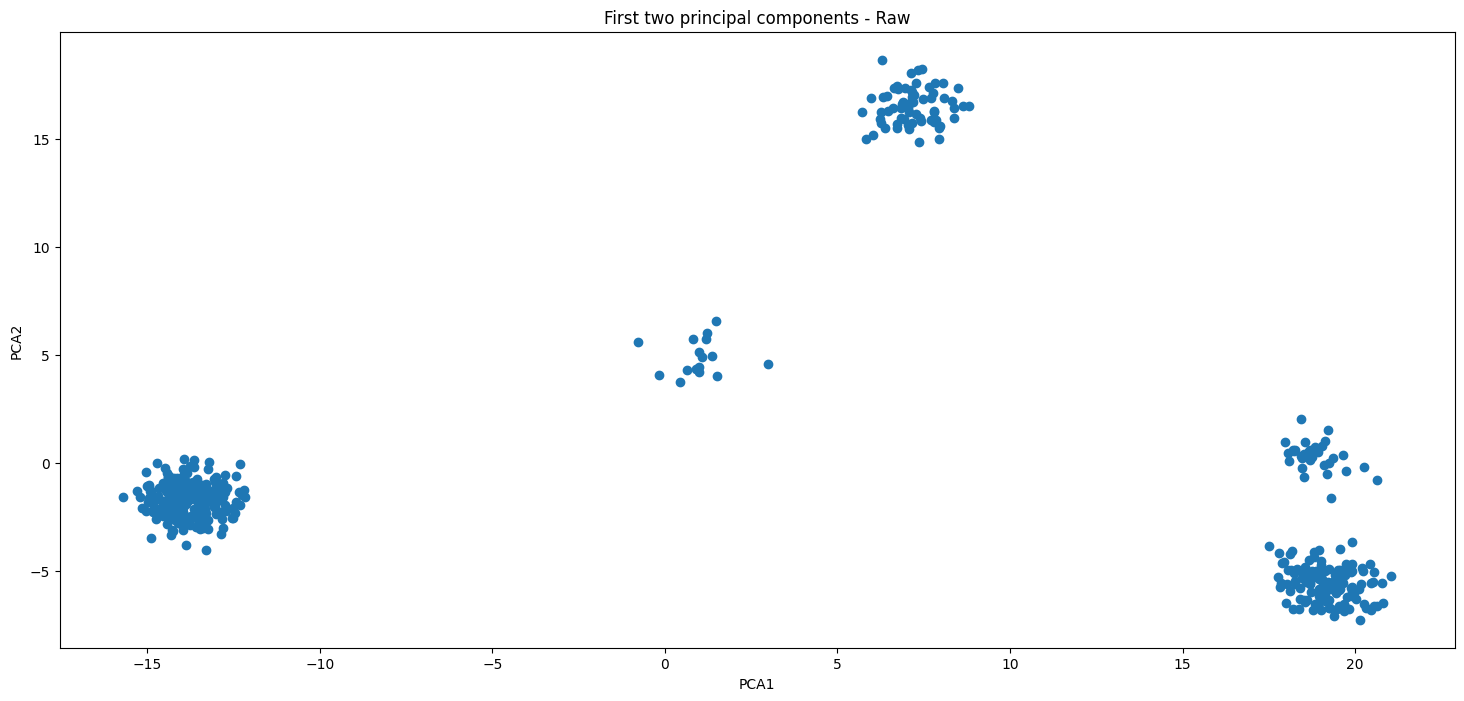

In [12]:
#Raw
from sklearn.decomposition import PCA
# 1. create and configure the model (call it "pca")
pcaR = PCA(n_components=10)

# 2. fit the model to the data (use pca.fit(...) )
pcaR.fit(df)
#print(pca.components_) # print the 10 principal component vectors

plt.figure(figsize=(18,8))

# 3. look at the model's explained_variance_ratio_ (i.e., pca.explained_variance_ratio_ where pca
#    is what you called the PCA object) to see how much variance the top two components capture.
print('The fraction of the variation explained by the first two components:', pcaR.explained_variance_ratio_[:2])

# 4. transform the data to a new array, call it "X_pca" (use pca.transform(...) )
X_pcaR = pcaR.transform(df)
X_pcaR.shape # array dimensions


# 5. Plot the first two components, as we did in class.
plt.scatter( X_pcaR[:,0], X_pcaR[:,1])
plt.title('First two principal components - Raw')
plt.xlabel('PCA1', fontsize=10)
plt.ylabel('PCA2', fontsize=10); # add ; so notebook doesn't print the Text object returned by plt.ylabel

print('Raw first two components:',pcaR.components_[0:2])
print("There are now 5 clusters")

mean: [ 7.50057258 12.30930242 11.3735      6.59779637  9.32402218  8.62340726
 10.63858468 10.69994153  7.351125    5.37351008]
variance: [23.04821623 68.56014866 21.34645777 10.84453631 31.11767405 48.6365343
 33.18960693 15.68430171  3.84555023 33.02346287]
The fraction of the scaled variation explained by the first two components: [0.71764809 0.14764088]
Scaled first two components: [[-0.32647638 -0.31443538  0.14691206  0.34063509 -0.35554144  0.36187925
  -0.33607219  0.29845379  0.26692899  0.35537525]
 [-0.31860803  0.41585037 -0.70255991 -0.17430066  0.21360362  0.13085589
  -0.29727978  0.12007822  0.14552278  0.12192439]]
There are now 5 clusters but scaled


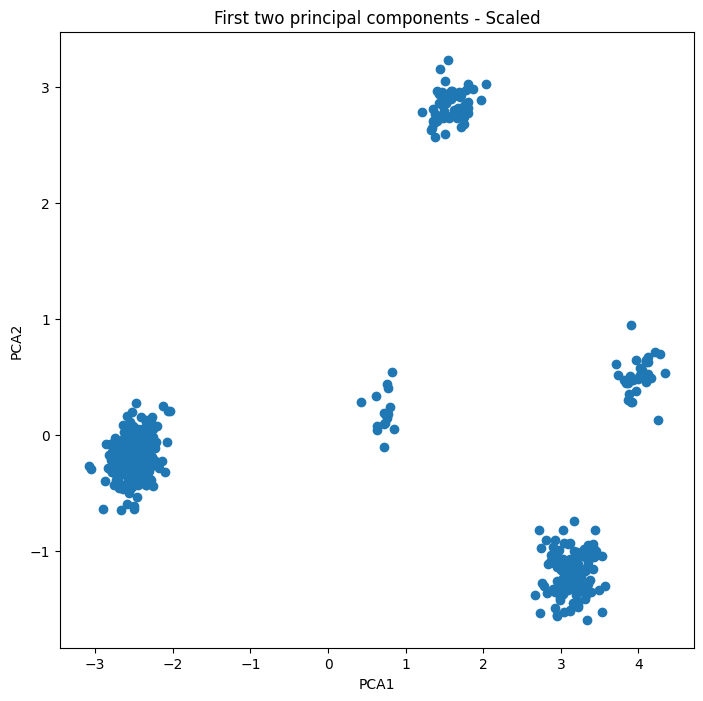

In [13]:
#Scaled
# start by importing the PCA class
from sklearn.preprocessing import StandardScaler
import numpy as np 

# Step 1: create the sklearn object
scaler = StandardScaler()
scaler

# Step 2: fit the model (in this case, that means estimating the mean and variance)
scaler.fit(df)
print('mean:', scaler.mean_)
print('variance:', scaler.var_)

# Step 3: apply the fitted model to transform the data (in this case,
#  that means subtract the mean and divide by the standard deviation)
df_scaled = scaler.transform(df)

# check the mean, std-dev of the first column
#print( np.mean( df_scaled[:,0]), np.std( df_scaled[:,0]))

# Step 1: create PCA model
pca = PCA(n_components=10)

# Step 2: solve for PCs
pca.fit(df_scaled)

# Step 3: transform the data to the new PC coordinate system
X_pca = pca.transform(df_scaled)

# set a larger figure size
plt.figure(figsize=(18,8))

# create a multi-panel plot:
nrows=1 # one row,
ncols=2 # two columns

plt.subplot(nrows, ncols, 1)
plt.scatter( X_pca[:,0], X_pca[:,1])
plt.title('First two principal components - Scaled')
plt.xlabel('PCA1', fontsize=10)
plt.ylabel('PCA2', fontsize=10)

print('The fraction of the scaled variation explained by the first two components:', pca.explained_variance_ratio_[:2])
print('Scaled first two components:',pca.components_[0:2])

print("There are now 5 clusters but scaled")

# Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


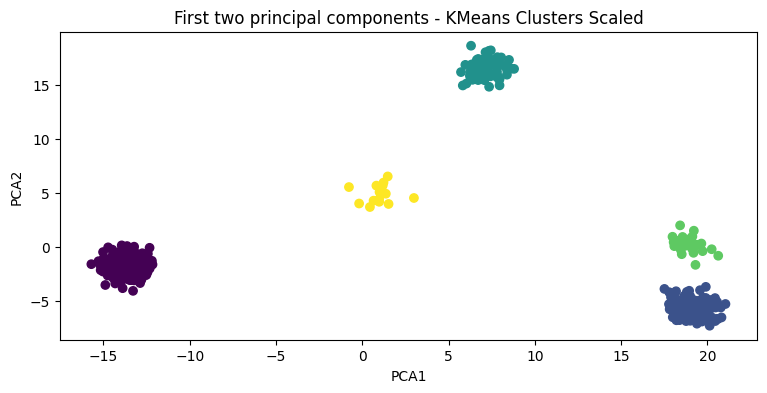

In [14]:
from sklearn.cluster import KMeans


# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
nclust= KMeans(n_clusters=5, random_state=10)

# 2. fit the object to the data using kmeans.fit
nclust.fit(df_scaled)
# 3. Get the list of clusters using kmeans.predict. Name the returned array of cluster assignments "clusters"

clusters = nclust.predict(df_scaled)

# Look at the array of clusters returned by kmeans.predict to see that the different values are integers between 0 and nclust-1, inclusive.

clusters

# To get the size of each cluster:

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

plt.figure(figsize=(9,4))

# use this code to remake the PCA plot colored by the kmeans clusters, where "clusters" is the 
#  array returned by the kmeans.predict function  
plt.scatter( X_pcaR[:,0], X_pcaR[:,1], c=clusters)
plt.title('First two principal components - KMeans Clusters Scaled')
plt.xlabel('PCA1', fontsize=10)
plt.ylabel('PCA2', fontsize=10);

# Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.

You could use pd.plotting.scatter_matrix or try importing seaborn (import seaborn as sns) and use sns.pairplot. Or (optional) try both and see which looks nicer. sns.pairplot has a hue argument that you can use for coloring by passing hue='clusters'. See the pd.plotting.scatter_matrix and sns.pairplot examples in the lectures10and11.ipynb jupyter notebook.

In [15]:
import seaborn as sns

sns.pairplot(df, hue='clusters'); # seaborn using kmeans clusters

ModuleNotFoundError: No module named 'seaborn'

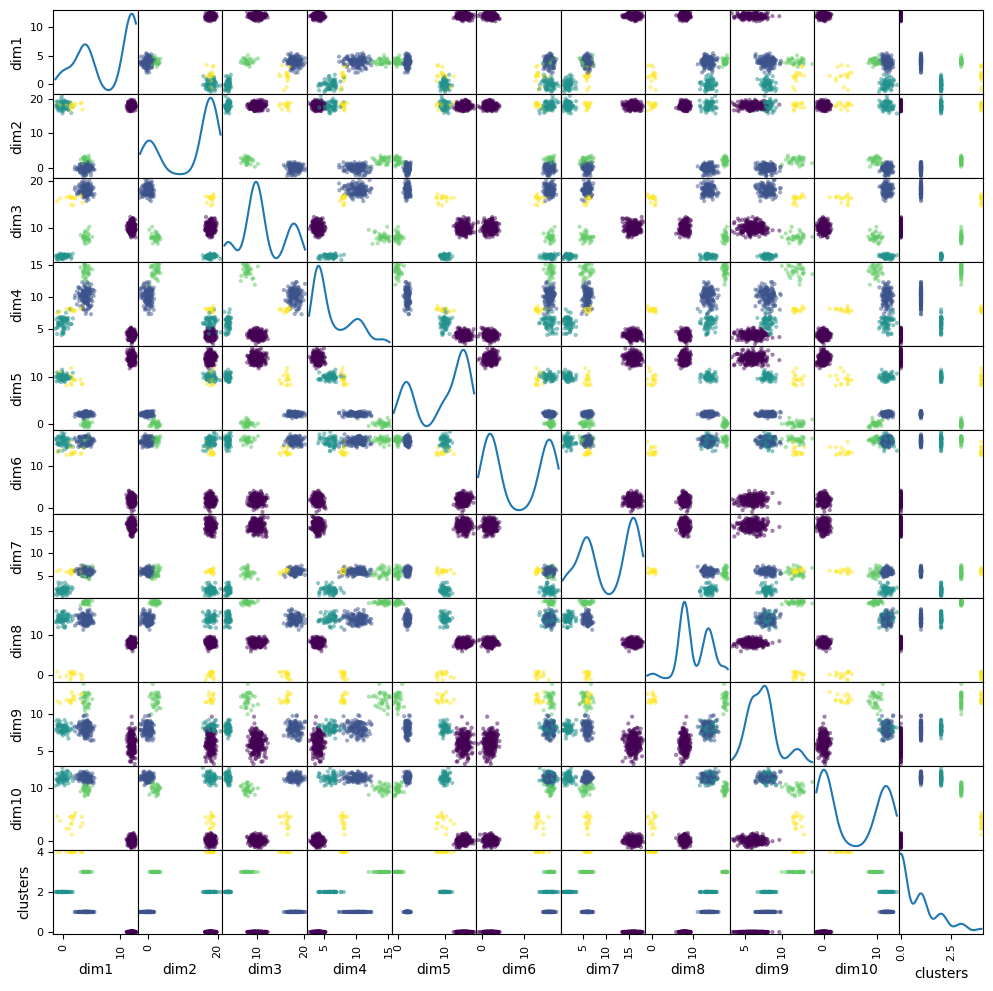

In [16]:
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12,12), c=df['clusters']); # pandas scatter matrix in 10x10 array and using kmeans clusters


# Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


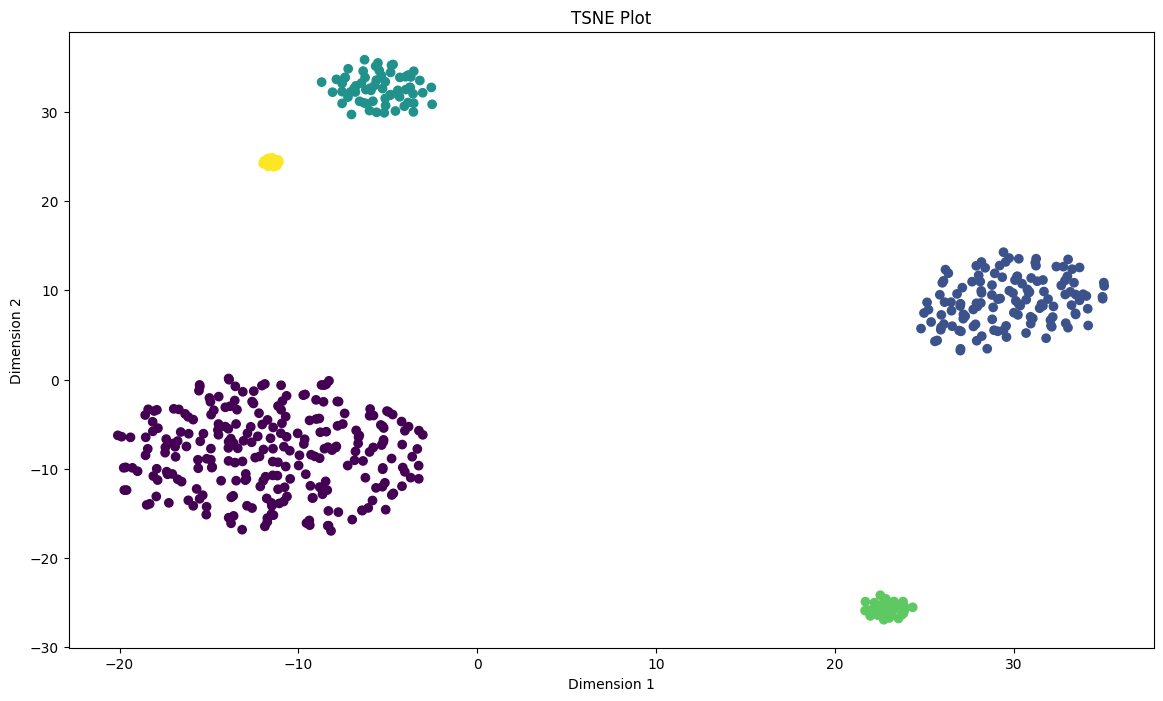

In [17]:
from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection) 

tsne = TSNE(n_components=2)

# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.

X_tsne = tsne.fit_transform(df)


# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments
plt.figure(figsize=(14,8)) # increase size of plot
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )
plt.title('TSNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2');